In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

1. NOTE In machine learning:
-
- a category in a classification problem is called a class.
- Data points are called samples. 
- The class associated with a specific sample is called a label.


1.RELU Activation Function:
-
- linear function that will output the input directly if it is positive, otherwise, it will output zero.

1. Optimizer
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, 
  such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

1. categorical_crossentropy: 
-   Used as a loss function for multi-class classification model where there are two or more output labels.
    The output label is assigned one-hot category encoding value in form of 0s and 1

# Old Approach or Techniques

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [4]:
network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [47]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [49]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2606 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1051 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0692 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0500 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0378 - accuracy: 0.9888


In [51]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9797


[0.07147946208715439, 0.9797000288963318]

In [53]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.2096540e-09, 3.2532985e-12, 6.8075633e-07, 5.3132106e-05,
       1.3827111e-12, 2.7299025e-08, 3.8079877e-14, 9.9994409e-01,
       2.8435318e-08, 1.9633951e-06], dtype=float32)

In [54]:
predictions[0].argmax()

7

In [55]:
 predictions[0][7]

0.9999441

In [56]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Loading the MNIST dataset in Keras

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images.ndim

3

In [8]:
train_labels.shape

(60000,)

In [9]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

  Test DataSets
-  

In [12]:
test_images.shape

(10000, 28, 28)

In [14]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# The network architecture of Model

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                         layers.Dense(512, activation="relu"),
                         layers.Dense(10, activation="softmax")])

- The core building block of neural networks is the layer
- our model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers.
  The second (and last) layer is a 10-waysoftmax classification layer, which means it will return an array of 10 probability 
  scores (summing to 1). Each score will be the probability that the current digit imagebelongs to one of our 10 digit classes.

- Three more things as part of the compilation step:
 -  An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve     its performance.
 -  A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to     steer itself in the right direction.
 -  Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were       correctly classified).

The compilation step
-   

In [19]:
model.compile(optimizer="rmsprop",
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

Preparing the data
-  

- our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values
  in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 *
  28) with values between 0 and 1.

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# “Fitting” the model

In [23]:
60000/128  #     step per epoches

468.75

In [ ]:
batch = train_images[:128]

# Next batch

batch = train_images[128:256]

In [24]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 10s 15ms/step - loss: 0.2566 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1024 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0681 - accuracy: 0.9804
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0494 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0371 - accuracy: 0.9890


In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9813


[0.05937777832150459, 0.9812999963760376]

Using the model to make predictions
-  

In [27]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.2096540e-09, 3.2532985e-12, 6.8075633e-07, 5.3132106e-05,
       1.3827111e-12, 2.7299025e-08, 3.8079877e-14, 9.9994409e-01,
       2.8435318e-08, 1.9633951e-06], dtype=float32)

- This first test digit has the highest probability score (0.99999106, almost 1) at
  index 7, so according to our model, it must be a 7:

In [29]:
 predictions[0].argmax()

7

In [30]:
predictions[0][7]

0.9999441

We can check that the test label agrees:
- 

In [32]:
test_labels[0]

7

Displaying the fourth digit
-

In [37]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
train_images.dtype

dtype('uint8')

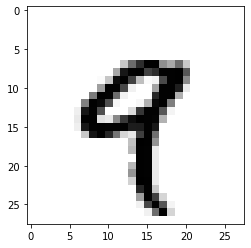

In [39]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [42]:
train_labels[4]

9

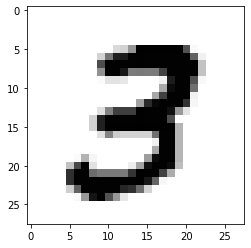

In [41]:
import matplotlib.pyplot as plt
digit = train_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [43]:
train_labels[7]

3